In [27]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch.utils.data as data

In [93]:
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.randn([num_examples, len(w)])
    y = torch.matmul(X, w) + b + torch.normal(0, 0.01, [num_examples])
    return X, y.view(-1, 1)


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
def plot_result(sz, features, pre, n_epochs, train_loss):
    plt.figure(figsize=(sz, sz)) 
    plt.subplot(2,2,1)
    plt.scatter(features[:,1].numpy(), pre.numpy(), 1)
    plt.title('y')
    plt.subplot(2,2,2)
    plt.scatter(features[:,0].numpy(), pre.numpy(), 1)
    plt.title('x')
    plt.subplot(2,2,4)
    plt.plot(list(range(n_epochs)), train_loss, color='r')
    plt.title('training loss')

<generator object Module.parameters at 0x7fbbe3de2270>
tensor([ 2.0000, -3.4000]) 4.2


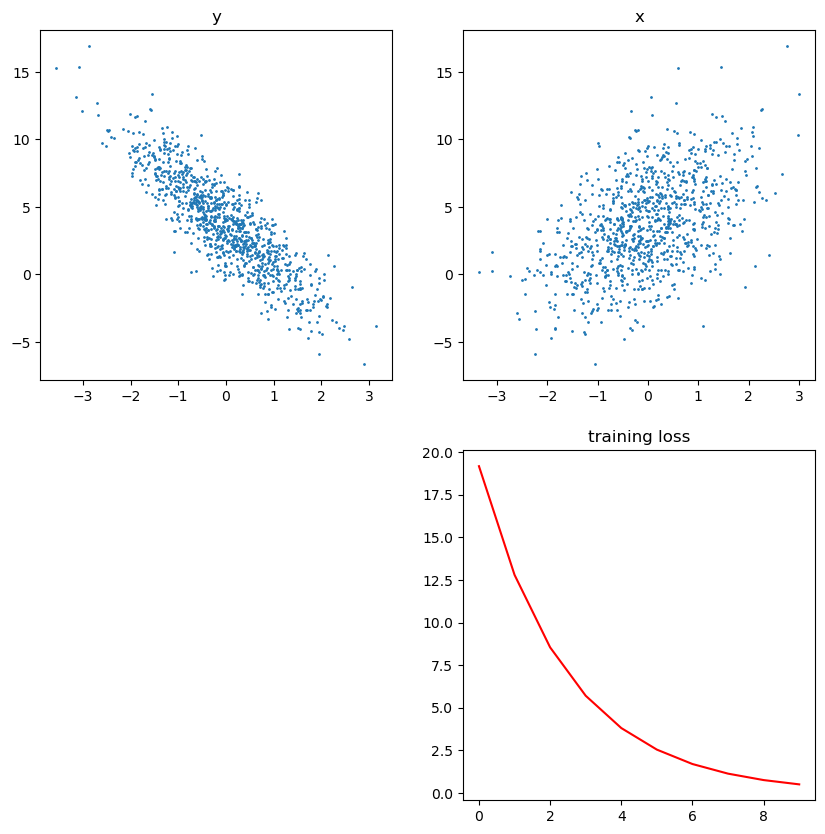

In [107]:
def data_iter(batch_size, features, labels):
    num = len(features)
    # 生成下标，随机打乱
    indices = list(range(num))
    random.shuffle(indices)
    for n in range(0, num, batch_size):
        idx = indices[n : min(n+batch_size, num)]
        yield features[idx], labels[idx]


class my_model():
    def __init__(self):
        w = torch.tensor([0.0, 0.0], requires_grad=True)
        b = torch.tensor([0.0], requires_grad=True)
        self.named_parameter = {"weight": w, "bias": b}
    
    def parameters(self):
        return self.named_parameter

    def __call__(self, X):
        return torch.matmul(X, self.named_parameter["weight"]) + self.named_parameter["bias"]

class my_sgd():
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr
    
    def step(self):
        with torch.no_grad():
            for param in self.params.values():
                param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params.values():
            param.grad.zero_()

class my_loss():
    def __call__(self, y_hat, y):
        return (y_hat - y.view(y_hat.shape)).pow(2).mean()

batch_size = 100
n_epochs = 10
lr = 0.01
#loss = my_loss()
#net = my_model()
#optimizer = my_sgd(net.parameters(), lr)
loss = torch.nn.MSELoss()
net = torch.nn.Sequential(torch.nn.Linear(2,1))
optimizer = torch.optim.SGD(net.parameters(), lr)

train_losses = []
test_losses = []
for i in range(n_epochs):
    iter = data_iter(batch_size, features, labels)
    #iter = data.DataLoader(data.TensorDataset(features, labels), batch_size, shuffle=True)
    for X,y in iter:
        y_pre = net(X)
        loss_result = loss(y, y_pre)
        loss_result.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    with torch.no_grad():
        y_pre = net(features)
        train_loss = loss(y_pre, labels)
        train_losses.append(train_loss)

plot_result(10, features, y_pre, n_epochs, train_losses)

print(net.parameters())
print(true_w, true_b)

In [105]:
loss = torch.nn.MSELoss()

input1 = torch.ones([5,5], dtype=torch.float32)
input2 = torch.zeros([5,5], dtype=torch.float32)

print(input1.shape)
print(input2.shape)

print(loss(input1, input2))

torch.Size([5, 5])
torch.Size([5, 5])
tensor(1.)
